# **CNN for Image Classification**

In [1]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.utils import to_categorical
from keras.datasets import cifar10
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

# **Step 1: Load and Explore CIFAR-10 Dataset**

In [2]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


# Display Sample Images with Class Labels

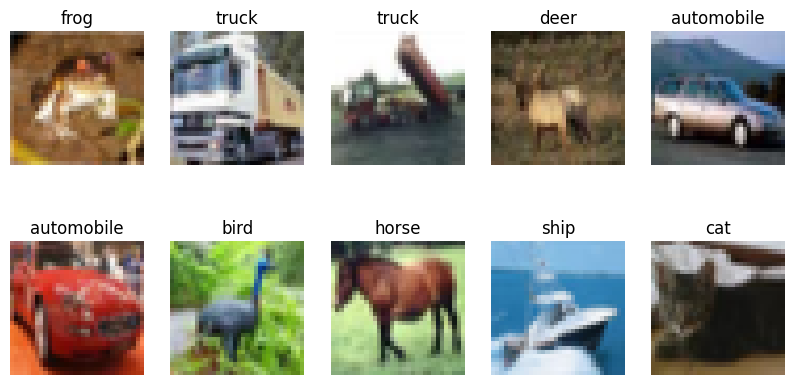

In [3]:
# Define the class labels
class_labels = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

# Initialize the figure and subplots
fig, axes = plt.subplots(2, 5, figsize=(10, 5))

# Iterate through the first 10 images
for i, ax in enumerate(axes.flat):
    # Select the image and label
    image, label = x_train[i], y_train[i]

    # Display the image
    ax.imshow(image, cmap='gray')

    # Set the title with the class label
    ax.set_title(f"{class_labels[label.item()]}")
    ax.axis('off')

# Display the figure
plt.show()

# **Data Normalization**

In [4]:
# Normalize pixel values to be between 0 and 1
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# **Converting Class Labels to One-Hot Encoding**

In [5]:
# Convert class vectors to binary class matrices / one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [6]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.])

# **Build the CNN Model**

In [7]:
# Define the CNN model
model = Sequential()
# Conv2D layer with 32 filters, kernel size 3x3, input shape (32, 32, 3)

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
# MaxPooling2D layer with pool size 2x2
model.add(MaxPooling2D((2, 2)))

#model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))


# Conv2D layer with 64 filters, kernel size 3x3

model.add(Conv2D(64, (3, 3), activation='relu'))
# MaxPooling2D layer with pool size 2x2
# Output size: 6x6x64
model.add(MaxPooling2D((2, 2)))

# Conv2D layer with 64 filters, kernel size 3x3

model.add(Conv2D(64, (3, 3), activation='relu'))

# Flatten layer
model.add(Flatten())

# Dense layer with 64 units

model.add(Dense(64, activation='relu'))
# Dense layer with 10 units (output layer)
# Input size: 64, Output size: 10

model.add(Dense(10, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
=['accuracy']



In [18]:
# Train the model
model.fit(x_train, y_train, batch_size=32, epochs=30,
          validation_data=(x_test, y_test))

Epoch 1/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9484 - loss: 0.1490 - val_accuracy: 0.6894 - val_loss: 1.9872
Epoch 2/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9553 - loss: 0.1244 - val_accuracy: 0.6983 - val_loss: 2.0541
Epoch 3/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9550 - loss: 0.1259 - val_accuracy: 0.6891 - val_loss: 2.0547
Epoch 4/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9609 - loss: 0.1109 - val_accuracy: 0.6833 - val_loss: 2.1868
Epoch 5/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9564 - loss: 0.1237 - val_accuracy: 0.6901 - val_loss: 2.1509
Epoch 6/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9559 - loss: 0.1253 - val_accuracy: 0.6868 - val_loss: 2.2511
Epoch 7/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9634 - loss: 0.1028 - val_accuracy: 0.6852 - val_loss: 2.2963
Epoch 8/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9628 - loss: 0.107

In [19]:
# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print('Test accuracy:', accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6932 - loss: 2.8978
Test accuracy: 0.6862999796867371


In [20]:
pred = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


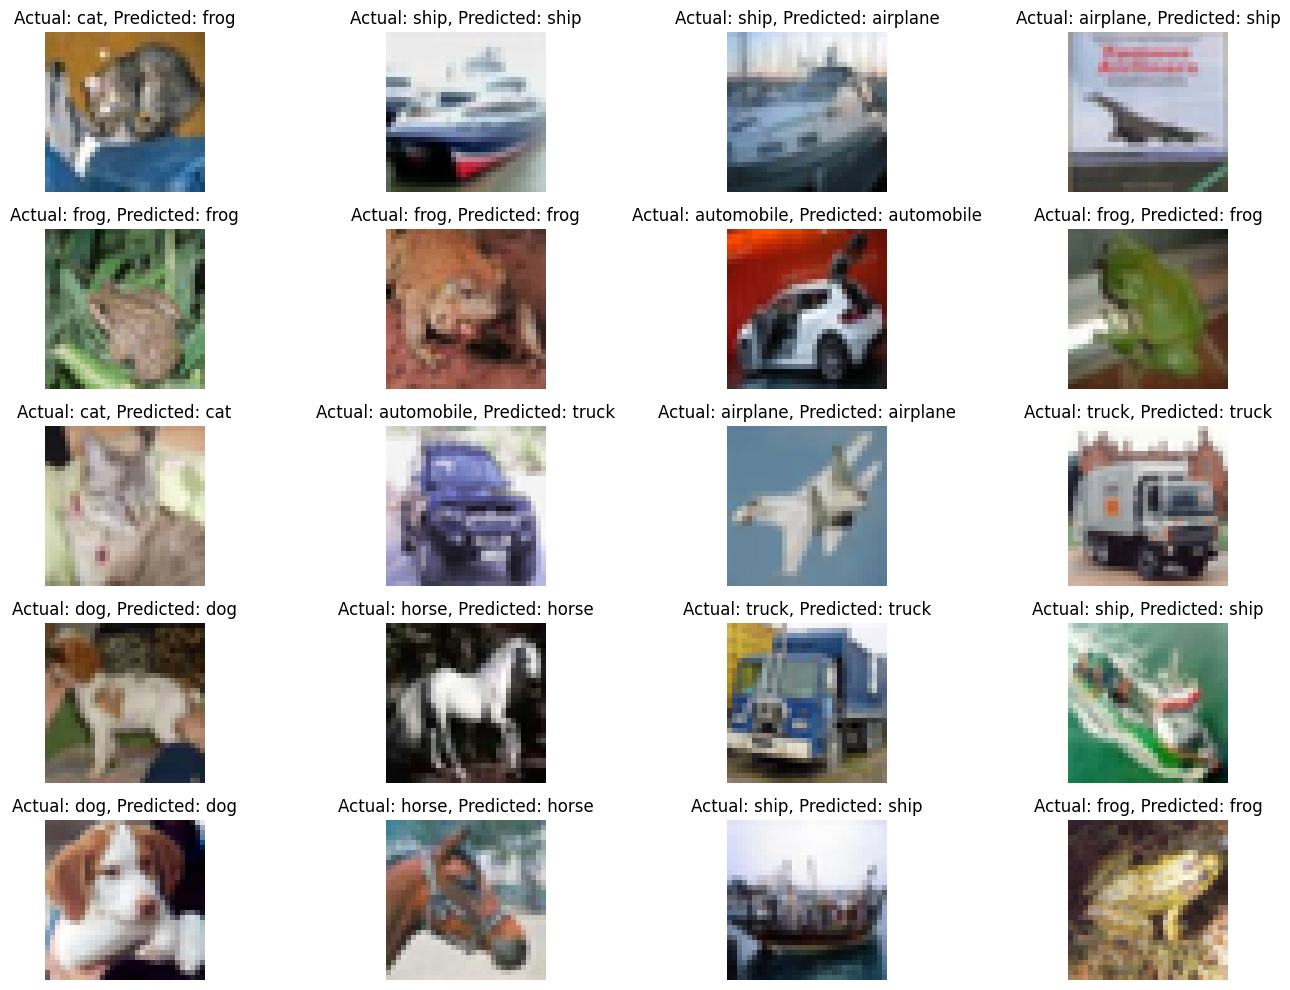

In [13]:
num_images_to_display = 20
num_columns = 4
num_rows = (num_images_to_display + num_columns - 1) // num_columns

fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 10))
for i, ax in enumerate(axes.flat):
    if i < num_images_to_display:
        ax.imshow(x_test[i])
        actual_label = class_labels[np.argmax(y_test[i])]
        predicted_label = class_labels[np.argmax(pred[i])]
        ax.set_title(f"Actual: {actual_label}, Predicted: {predicted_label}")
        ax.axis('off')
    else:
        ax.axis('off')

plt.tight_layout()
plt.show()
